In [107]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt


In [108]:
hiv_data = np.load('PMLSdata/01HIVSeries/HIVseries.npy')
np.shape(hiv_data)

(16, 2)

In [109]:
"""
t should be vectorized
A, alpha, B, and beta should be constants
"""
def V(t, A, alpha, B, beta):
    return A * np.exp(-alpha*t) + B * np.exp(-beta*t)

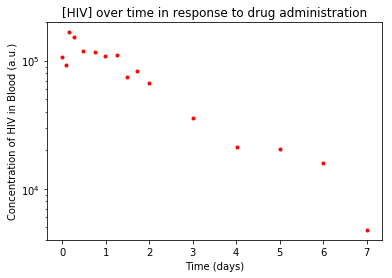

In [110]:
plt.semilogy(hiv_data[:, 0], hiv_data[:, 1], 'r.')
plt.title("[HIV] over time in response to drug administration")
plt.xlabel("Time (days)")
plt.ylabel(r'Concentration of HIV in Blood (a.u.)')
plt.show()

array([ 11.10397931,  10.47469306])

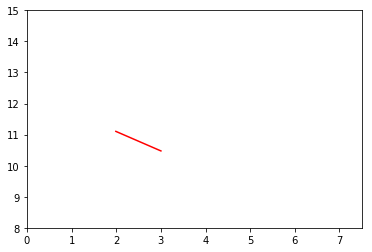

In [111]:
# Linearize at late time periods
plt.plot(hiv_data[10:12, 0], np.log(hiv_data[10:12,1]), 'r-')
plt.xlim([0,7.5])
plt.ylim([8, 15])

np.log(hiv_data[10:12, 1])

In [112]:
# Assuming that alpha > beta, at large times t, logV = logB - beta*t
# Intercept is at about 13
# Therefore
B = np.exp(13)
# beta is the slope
beta = -1*(np.log(hiv_data[12,1])-np.log(hiv_data[11,1]))/(hiv_data[12,0] - hiv_data[11,0])
# Using initial conditions
A = hiv_data[0,1]-B
beta

0.51146822149480631

In [120]:
# Tune alpha using sum of abs of error
time = hiv_data[:,0]
best_alpha = 0
best_error = 10000000
for alpha in np.linspace(beta, 5, 1000):
    error = np.sum(np.abs((V(time, A, alpha, B, beta)-hiv_data[:,1])))
    if error < best_error:
        best_error = error
        best_alpha = alpha

alpha = best_alpha
alpha

0.70466828803707193

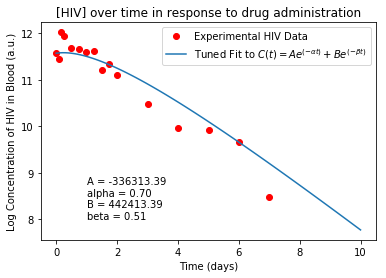

In [122]:
# Plot the Fit
time = np.linspace(0,10,100)
fit = V(time, A, alpha, B, beta)
plt.plot(hiv_data[:,0], np.log(hiv_data[:,1]), 'ro')
plt.plot(time, np.log(fit))
plt.title("[HIV] over time in response to drug administration")
plt.xlabel("Time (days)")
plt.ylabel(r'Log Concentration of HIV in Blood (a.u.)')
plt.legend(["Experimental HIV Data", r"Tuned Fit to $C(t)=Ae^{(- \alpha t )} + Be^ {(- \beta t)}$"])
plt.text(1,8, "A = %.2f \nalpha = %.2f \nB = %.2f \nbeta = %.2f" % (A, alpha, B, beta))

plt.show()


In [123]:
print("A = %.2f" % A)
print("alpha = %.2f" % alpha)
print("B = %.2f" % B)
print("beta = %.2f" % beta)




A = -336313.39
alpha = 0.70
B = 442413.39
beta = 0.51


In [119]:
# Infection Rate = 1/beta
infection_rate = 1/beta
infection_rate
# Infection Rate is much much quicker than the dormant period! 
# Showing that it wasn't a lack infection rate that caused dormancy

1.9551556831378907

## Using the equation:
## Nv = gammmaN10/(alpha-beta) * exp(-beta * t) + (Nv_0 - gammaN10/(alpha-beta))*exp(-alpha*t)
###  We can solve for gammaN10 
### gammaN10 = B*(alpha-beta)

In [124]:
# part a
gamma_N10 = B*(alpha-beta)
gamma_N10

85474.296775312891

In [130]:
# part b
# multiply by total virion population
gamma_N10_estimate = gamma_N10 * 2.5 * (10**3)
print(gamma_N10_estimate)

213685741.938


In [129]:
# Part c
gamma = 100*beta
N_10 = gamma_N10_estimate/gamma
print("Estimate of infected population = %.1f" % N_10)

Estimate of infected population = 4177888.9
